In [14]:
#loading data sample()
#time span 2012-01-01 to 2018-08-31
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def get_stocks(tickers, startdate, enddate):
    def data(ticker):
        return(quandl.get(ticker, start_date = startdate, end_date = enddate))
    datas = map(data, tickers)
    return(pd.concat(datas, keys = tickers, names= ['Ticker','Date']))
tickers = ['WIKI/AMZN','WIKI/NFLX','WIKI/GS']
alldata = get_stocks(tickers, '2012-01-01','2018-08-31')
alldata.head()

Open     High      Low   Close     Volume  \
Ticker    Date                                                      
WIKI/AMZN 2012-01-03  175.89  179.475  175.550  179.03  5110800.0   
          2012-01-04  179.21  180.500  176.065  177.51  4205200.0   
          2012-01-05  175.94  178.250  174.050  177.61  3809100.0   
          2012-01-06  178.07  184.650  177.500  182.61  7008400.0   
          2012-01-09  182.76  184.370  177.000  178.56  5056900.0   

                      Ex-Dividend  Split Ratio  Adj. Open  Adj. High  \
Ticker    Date                                                         
WIKI/AMZN 2012-01-03          0.0          1.0     175.89    179.475   
          2012-01-04          0.0          1.0     179.21    180.500   
          2012-01-05          0.0          1.0     175.94    178.250   
          2012-01-06          0.0          1.0     178.07    184.650   
          2012-01-09          0.0          1.0     182.76    184.370   

                      Adj. Low  Adj. Close  Adj. Volume  
Ticker    Date                                           
WIKI/AMZN 2012-01-03   175.550      179.03    5110800.0  
          2012-01-04   176.065      177.51    4205200.0  
          2012-01-05   174.050      177.61    3809100.0  
          2012-01-06   177.500      182.61    7008400.0  
          2012-01-09   177.000      178.56    5056900.0

In [28]:
# re-organize data
alldata = pd.DataFrame(alldata)
data = alldata[['Adj. Close']].copy()
data.rename(columns = {'Adj. Close':'Price'}, inplace = True)
data = pd.DataFrame(data)
data['returns'] = np.log(data['Price']/data['Price'].shift(1))

In [29]:
SMA = 50 #moving average window
data['SMA'] = data['Price'].rolling(SMA).mean()

In [36]:
print('AMZN', data.loc['WIKI/AMZN','Price'].mean())
print('NFLX', data.loc['WIKI/NFLX','Price'].mean())
print('GS', data.loc['WIKI/GS','Price'].mean())

AMZN 533.8482738825029
NFLX 84.58696411705724
GS 170.6214695632398


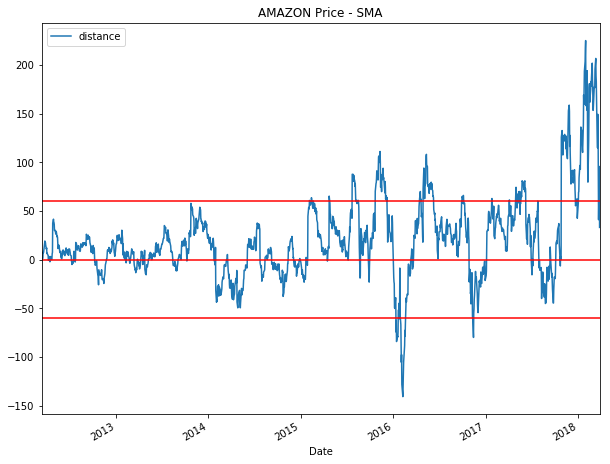

In [41]:
data['distance'] = data['Price'] - data['SMA']
data.loc['WIKI/AMZN','distance'].dropna().plot(figsize = (10,8),legend = True, title = 'AMAZON Price - SMA')

threshold = 60

plt.axhline(threshold, color='r')
plt.axhline(-threshold, color='r')
plt.axhline(0, color='r')



In [51]:
data.loc['WIKI/AMZN','Position'] = np.where(data.loc['WIKI/AMZN','distance']> threshold, -1, np.nan)
data.loc['WIKI/AMZN','Position'] = np.where(data.loc['WIKI/AMZN','distance']< - threshold, -1, data.loc['WIKI/AMZN','Position'])
data.loc['WIKI/AMZN','Position'] = np.where(data.loc['WIKI/AMZN','Position']*data.loc['WIKI/AMZN','Position'].shift(1) <0 
                                                 , 0, data.loc['WIKI/AMZN','Position'])

data.loc['WIKI/AMZN','Position']


Date
2012-01-03    NaN
2012-01-04    NaN
2012-01-05    NaN
2012-01-06    NaN
2012-01-09    NaN
2012-01-10    NaN
2012-01-11    NaN
2012-01-12    NaN
2012-01-13    NaN
2012-01-17    NaN
2012-01-18    NaN
2012-01-19    NaN
2012-01-20    NaN
2012-01-23    NaN
2012-01-24    NaN
2012-01-25    NaN
2012-01-26    NaN
2012-01-27    NaN
2012-01-30    NaN
2012-01-31    NaN
2012-02-01    NaN
2012-02-02    NaN
2012-02-03    NaN
2012-02-06    NaN
2012-02-07    NaN
2012-02-08    NaN
2012-02-09    NaN
2012-02-10    NaN
2012-02-13    NaN
2012-02-14    NaN
             ... 
2018-02-13   -1.0
2018-02-14   -1.0
2018-02-15   -1.0
2018-02-16   -1.0
2018-02-20   -1.0
2018-02-21   -1.0
2018-02-22   -1.0
2018-02-23   -1.0
2018-02-26   -1.0
2018-02-27   -1.0
2018-02-28   -1.0
2018-03-01   -1.0
2018-03-02   -1.0
2018-03-05   -1.0
2018-03-06   -1.0
2018-03-07   -1.0
2018-03-08   -1.0
2018-03-09   -1.0
2018-03-12   -1.0
2018-03-13   -1.0
2018-03-14   -1.0
2018-03-15   -1.0
2018-03-16   -1.0
2018-03-19   -1.0
2018-

In [52]:
data.loc['WIKI/AMZN','Position'] = data.loc['WIKI/AMZN','Position'].ffill().fillna(0)
data.loc['WIKI/AMZN','Position']


Date
2012-01-03   NaN
2012-01-04   NaN
2012-01-05   NaN
2012-01-06   NaN
2012-01-09   NaN
2012-01-10   NaN
2012-01-11   NaN
2012-01-12   NaN
2012-01-13   NaN
2012-01-17   NaN
2012-01-18   NaN
2012-01-19   NaN
2012-01-20   NaN
2012-01-23   NaN
2012-01-24   NaN
2012-01-25   NaN
2012-01-26   NaN
2012-01-27   NaN
2012-01-30   NaN
2012-01-31   NaN
2012-02-01   NaN
2012-02-02   NaN
2012-02-03   NaN
2012-02-06   NaN
2012-02-07   NaN
2012-02-08   NaN
2012-02-09   NaN
2012-02-10   NaN
2012-02-13   NaN
2012-02-14   NaN
              ..
2018-02-13   NaN
2018-02-14   NaN
2018-02-15   NaN
2018-02-16   NaN
2018-02-20   NaN
2018-02-21   NaN
2018-02-22   NaN
2018-02-23   NaN
2018-02-26   NaN
2018-02-27   NaN
2018-02-28   NaN
2018-03-01   NaN
2018-03-02   NaN
2018-03-05   NaN
2018-03-06   NaN
2018-03-07   NaN
2018-03-08   NaN
2018-03-09   NaN
2018-03-12   NaN
2018-03-13   NaN
2018-03-14   NaN
2018-03-15   NaN
2018-03-16   NaN
2018-03-19   NaN
2018-03-20   NaN
2018-03-21   NaN
2018-03-22   NaN
2018-03-2

In [ ]:
data.loc['WIKI/AMZN','Position'].ix[SMA:].plot(ylim=[-1.1, 1.1], figsize=(10, 6))